# Step-Down SC DC-DC Converter

![SC DC-DC converter circuit](sc_dc_dc_converter_circuit.png)

In [52]:
from sympy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the variables
Vin, Vin_1, Vin_2, Vout_n_1, Vout_n_1_2, Vout_n, Voutp, V_CR, Cfly, Cout, Cp_1, Cp_2, Rout, Q_1, Q_2, T_clk, F_clk = symbols('V_in, V_in1 V_in2 V_out[n-1] V_out[n-1/2] V_out[n] V_outp, V_CR C_fly C_out C_p1 C_p2 R_out, Q_1, Q_2, T_clk, F_clk')

## Equations

In [53]:
# Ideal equations
eq1 = Eq((Vin_1 - Vout_n_1) * Cfly + Vout_n_1 * Cout, (Vout_n_1_2 - Vin_2) * Cfly + Vout_n_1_2 * Cout + Vout_n_1_2/Rout * T_clk/2)
eq2 = Eq((Vin_2 - Vout_n_1_2) * Cfly + Vout_n_1_2 * Cout, (Vout_n - Vin_1) * Cfly + Vout_n * Cout+ Vout_n/Rout * T_clk/2)

# Real equations considering the parasitic capacitances
eq1_p = Eq((Vin_1 - Vout_n_1) * Cfly + Vout_n_1 * Cout + Cp_1 * Vin_1, (Vout_n_1_2-Vin_2) * Cfly + Vout_n_1_2 * (Cout + Cp_1) + Vout_n_1_2/Rout * T_clk/2)
eq2_p = Eq((Vin_2 - Vout_n_1_2) * Cfly + Vout_n_1_2 * Cout + Cp_2 * Vin_2, (Vout_n - Vin_1) * Cfly + Vout_n * (Cout + Cp_2) + Vout_n/Rout * T_clk/2)

## Ideal Analysis

### Output Voltage

In [54]:
Vout_n_1_2_expr = solve(eq1, Vout_n_1_2)[0]                 # solve eq1 for Vout_n_1_2
Vout_n_expr = solve(eq2, Vout_n)[0]                         # solve eq2 for Vout_n
Vout_n_expr = Vout_n_expr.subs(Vout_n_1_2, Vout_n_1_2_expr) # substitute Vout_n_1_2 in Vout_n_expr

# Expand and collect terms in the numerator and denominator
Vout_n_expr_num, Vout_n_expr_den = Vout_n_expr.as_numer_denom()
Vout_n_expr_num_collected = collect(expand(Vout_n_expr_num), [(Vout_n_1*Rout**2), Vin_1*Cfly, Vin_2*Cfly])
Vout_n_expr_den_collected = collect(expand(Vout_n_expr_den), [T_clk*Rout, Rout])

Vout_n_expr = Vout_n_expr_num_collected / Vout_n_expr_den_collected

display(Vout_n_expr)
# print(latex(Vout_n_expr))

(C_fly*V_in1*(8*C_out*R_out**2 + 2*R_out*T_clk) + C_fly*V_in2*(8*C_out*R_out**2 + 2*R_out*T_clk) + R_out**2*V_out[n-1]*(4*C_fly**2 - 8*C_fly*C_out + 4*C_out**2))/(R_out**2*(4*C_fly**2 + 8*C_fly*C_out + 4*C_out**2) + R_out*T_clk*(4*C_fly + 4*C_out) + T_clk**2)

In the permanent regime Vout_n = Vout_n_1 = Voutp

In [55]:
eq_Vout_n = Eq(Vout_n, Vout_n_expr)                         
eq_Vout_n = eq_Vout_n.subs({Vout_n:Voutp, Vout_n_1:Voutp})  # Vout_n = Vout_n_1 = Voutp
Voutp_expr = solve(eq_Vout_n, Voutp)[0]                     # solve for Voutp

display(Voutp_expr)
# print(latex(Voutp_expr))

2*C_fly*R_out*(V_in1 + V_in2)/(4*C_fly*R_out + T_clk)

### Efficiency

In [56]:
delta_in_1 = eq1.subs(Cout, 0).subs(T_clk, 0).subs(Vout_n_1, Voutp).subs(Vout_n_1_2, Voutp)
delta_Q_in = collect(expand(delta_in_1.lhs - delta_in_1.rhs), Cfly)

delta_out_1 = eq2.subs(Cout, 0).subs(T_clk, 0).subs(Vout_n, Voutp).subs(Vout_n_1_2, Voutp)
delta_out_2 = eq1.subs(Cout, 0).subs(T_clk, 0).subs(Vout_n_1, Voutp).subs(Vout_n_1_2, Voutp)
delta_Q_out_1 = collect(expand(delta_out_1.lhs - delta_out_1.rhs), Cfly)
delta_Q_out_2 = collect(expand(delta_out_2.lhs - delta_out_2.rhs), Cfly)

delta_Q_out = delta_Q_out_1 + delta_Q_out_2

In [57]:
eff = (delta_Q_out * Voutp) / (delta_Q_in * Vin_1)

eff_params = eff.subs(Voutp, Voutp_expr).subs(Vin_2, 0)
eff_vcr = eff.subs(Voutp/Vin_1, V_CR)

display(eff_params)
# print(latex(eff_params))
display(eff_vcr)
# print(latex(eff_vcr))

4*C_fly*R_out/(4*C_fly*R_out + T_clk)

2*V_CR

### Clock Frequency

In [58]:
eq_Voutp = Eq(Voutp, Voutp_expr)

T_clk_i = solve(eq_Voutp, T_clk)[0]
F_clk_i = 1/T_clk_i

display(F_clk_i)
# print(latex(F_clk_i))

# simplify using Vin_2 = 0
# sc_1_T_clk_i = T_clk_i.subs(Vin_2, 0)
# sc_1_F_clk_i = 1/sc_1_T_clk_i
# display(sc_1_F_clk_i)

V_outp/(2*C_fly*R_out*(V_in1 + V_in2 - 2*V_outp))

## Considering parasitic capacitances

### Output Voltage

In [59]:
Vout_n_1_2_p_expr = solve(eq1_p, Vout_n_1_2)[0]                     # solve eq1_p for Vout_n_1_2
Vout_n_p_expr = solve(eq2_p, Vout_n)[0]                             # solve eq2_p for Vout_n
Vout_n_p_expr = Vout_n_p_expr.subs(Vout_n_1_2, Vout_n_1_2_p_expr)   # substitute Vout_n_1_2 in Vout_n_expr

# Expand and collect terms in the numerator and denominator
Vout_n_p_expr_num, Vout_n_p_expr_den = Vout_n_p_expr.as_numer_denom()
Vout_n_p_expr_num_collected = collect(expand(Vout_n_p_expr_num), [(Vout_n_1*Rout**2), Vin_1, Vin_2])
Vout_n_p_expr_den_collected = collect(expand(Vout_n_p_expr_den), [T_clk*Rout, Rout])

Vout_n_p_expr = Vout_n_p_expr_num_collected / Vout_n_p_expr_den_collected

display(Vout_n_p_expr)
# print(latex(Vout_n_p_expr))

In the permanent regime Vout_n = Vout_n_1 = Voutp

In [60]:
eq_Vout_n_p = Eq(Vout_n, Vout_n_p_expr)                         
eq_Vout_n_p = eq_Vout_n_p.subs({Vout_n:Voutp, Vout_n_1:Voutp})  # Vout_n = Vout_n_1 = Voutp
Voutp_p_expr = solve(eq_Vout_n_p, Voutp)[0]                     # solve for Voutpm

Voutp_p_expr_num, Voutp_p_expr_den = Voutp_p_expr.as_numer_denom()
Voutp_p_expr_num_collected = collect(expand(Voutp_p_expr_num), [Vin_1, Vin_2])
Voutp_p_expr_den_collected = collect(expand(Voutp_p_expr_den), [Rout**2, Rout])
Voutp_p_expr = Voutp_p_expr_num_collected / Voutp_p_expr_den_collected

display(Voutp_p_expr)
# print(latex(Voutp_p_expr))

Simplifying with Cout → ∞

In [61]:
Voutp_p_lim_expr = limit(Voutp_p_expr, Cout, oo)
display(Voutp_p_lim_expr)

# Expand and collect terms in the numerator and denominator
Voutp_p_lim_expr_num, Voutp_p_lim_expr_den = Voutp_p_lim_expr.as_numer_denom()
Voutp_p_lim_expr_num_collected = collect(expand(Voutp_p_lim_expr_num), [Vin_1*Rout**2, Vin_2*Rout**2])
Voutp_p_lim_expr_den_collected = collect(expand(Voutp_p_lim_expr_den), [Rout**2])
Voutp_p_lim_expr = Voutp_p_lim_expr_num_collected / Voutp_p_lim_expr_den_collected

# display(Voutp_p_lim_expr)

(8*C_fly*R_out**2*V_in1 + 8*C_fly*R_out**2*V_in2 + 4*C_p1*R_out**2*V_in1 + 4*C_p2*R_out**2*V_in2)/(16*C_fly*R_out**2 + 4*C_p1*R_out**2 + 4*C_p2*R_out**2 + 4*R_out*T_clk)

### Efficiency

In [62]:
delta_in_1_p = eq1_p.subs(Cout, 0).subs(T_clk, 0).subs(Vout_n_1, Voutp).subs(Vout_n_1_2, Voutp)
delta_Q_in_p = collect(expand(delta_in_1_p.lhs - delta_in_1_p.rhs), Cfly)

delta_out_1_p = eq2_p.subs(Cout, 0).subs(T_clk, 0).subs(Vout_n, Voutp).subs(Vout_n_1_2, Voutp)
delta_out_2_p = eq1_p.subs(Cout, 0).subs(T_clk, 0).subs(Vout_n_1, Voutp).subs(Vout_n_1_2, Voutp)
delta_Q_out_1_p = collect(expand(delta_out_1_p.lhs - delta_out_1_p.rhs), Cfly)
delta_Q_out_2_p = collect(expand(delta_out_2_p.lhs - delta_out_2_p.rhs), Cfly)

delta_Q_out_p = delta_Q_out_1_p + delta_Q_out_2_p

In [63]:
eff_p = (delta_Q_out_p * Voutp) / (delta_Q_in_p * Vin_1)

eff_p_params = eff_p.subs(Voutp, Voutp_p_expr).subs(Vin_2, 0)
eff_p_vcr = eff_p.subs(Voutp/Vin_1, V_CR).subs(Vin_2, 0)

# eff_p_vcr = eff_p.subs(Vin_2, 0).subs(Voutp, V_CR).subs(Vin_1, 1)

eff_p_vcr = eff_p_vcr.subs(Voutp, V_CR*Vin_1)

eff_p_vcr_num, eff_p_vcr_den = eff_p_vcr.as_numer_denom()
eff_p_vcr_num_collected = collect(expand(eff_p_vcr_num), [Vin_1])
eff_p_vcr_den_collected = collect(expand(eff_p_vcr_den), [Vin_1])
eff_p_vcr = eff_p_vcr_num_collected/eff_p_vcr_den_collected

eff_p_vcr_num, eff_p_vcr_den = eff_p_vcr.as_numer_denom()
eff_p_vcr_num_collected = collect(expand(eff_p_vcr_num), [V_CR**2, V_CR])
eff_p_vcr_den_collected = collect(expand(eff_p_vcr_den), [V_CR])
eff_p_vcr = eff_p_vcr_num_collected/eff_p_vcr_den_collected

display(eff_p_params)
# print(latex(eff_p_params))
display(eff_p_vcr)
# print(latex(eff_p_vcr))

(8*C_fly*C_out*R_out**2 + 2*C_fly*R_out*T_clk + 4*C_out*C_p1*R_out**2)*(2*C_fly*(V_in1 - 2*V_in1*(8*C_fly*C_out*R_out**2 + 2*C_fly*R_out*T_clk + 4*C_out*C_p1*R_out**2)/(R_out**2*(16*C_fly*C_out + 4*C_fly*C_p1 + 4*C_fly*C_p2 + 4*C_out*C_p1 + 4*C_out*C_p2 + 4*C_p1*C_p2) + R_out*(4*C_fly*T_clk + 4*C_out*T_clk + 2*C_p1*T_clk + 2*C_p2*T_clk) + T_clk**2)) + C_p1*V_in1 - C_p1*V_in1*(8*C_fly*C_out*R_out**2 + 2*C_fly*R_out*T_clk + 4*C_out*C_p1*R_out**2)/(R_out**2*(16*C_fly*C_out + 4*C_fly*C_p1 + 4*C_fly*C_p2 + 4*C_out*C_p1 + 4*C_out*C_p2 + 4*C_p1*C_p2) + R_out*(4*C_fly*T_clk + 4*C_out*T_clk + 2*C_p1*T_clk + 2*C_p2*T_clk) + T_clk**2) - C_p2*V_in1*(8*C_fly*C_out*R_out**2 + 2*C_fly*R_out*T_clk + 4*C_out*C_p1*R_out**2)/(R_out**2*(16*C_fly*C_out + 4*C_fly*C_p1 + 4*C_fly*C_p2 + 4*C_out*C_p1 + 4*C_out*C_p2 + 4*C_p1*C_p2) + R_out*(4*C_fly*T_clk + 4*C_out*T_clk + 2*C_p1*T_clk + 2*C_p2*T_clk) + T_clk**2))/((C_fly*(V_in1 - 2*V_in1*(8*C_fly*C_out*R_out**2 + 2*C_fly*R_out*T_clk + 4*C_out*C_p1*R_out**2)/(R_o

(V_CR**2*(-4*C_fly - C_p1 - C_p2) + V_CR*(2*C_fly + C_p1))/(C_fly + C_p1 + V_CR*(-2*C_fly - C_p1))

### Clock Frequency

In [64]:
eq_Voutp_p = Eq(Voutp, Voutp_p_expr)

T_clk_p = solve(eq_Voutp_p, T_clk)[0]
F_clk_p = 1/T_clk_p

display(F_clk_p)
# print(latex(F_clk_p))

# # simplify using Vin_2 = 0
# sc_1_T_clk_p = T_clk_p.subs(Vin_2, 0)
# sc_1_F_clk_p = 1/sc_1_T_clk_p
# display(sc_1_F_clk_p)

Considering the approximation that Cout → ∞

In [65]:
eq_Voutp_p_lim = Eq(Voutp, Voutp_p_lim_expr)

sc_1_T_clk_p_lim_expr = solve(eq_Voutp_p_lim, T_clk)[0]
sc_1_F_clk_p_lim_expr = 1/sc_1_T_clk_p_lim_expr

display(sc_1_F_clk_p_lim_expr)
# print(latex(F_clk_p_lim_expr))

# # simplify using Vin_2 = 0
# sc_1_T_clk_p_lim = Voutp_p_lim_expr.subs(Vin_2, 0)
# sc_1_F_clk_p_lim = 1/sc_1_T_clk_p_lim
# display(sc_1_F_clk_p_lim)

# Calculation Functions

In [66]:
# calculate Vout using the expression considering parasitic capacitances
def calc_Vout(Vin_1_val, Vin_2_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, Rout_val, T_clk_val):
    res = Voutp_p_expr.subs({
        Vin_1: Vin_1_val,
        Vin_2: Vin_2_val,
        Cfly: Cfly_val,
        Cout: Cout_val,
        Cp_1: Cp_1_val,
        Cp_2: Cp_2_val,
        Rout: Rout_val,
        T_clk: T_clk_val
    })
    return res.evalf()

# calculate the efficiency using the expression considering parasitic capacitances
def calc_Efficiency(Vin_1_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, Rout_val, T_clk_val):
    res = eff_p_params.subs({
        Vin_1: Vin_1_val,
        Cfly: Cfly_val,
        Cout: Cout_val,
        Cp_1: Cp_1_val,
        Cp_2: Cp_2_val,
        Rout: Rout_val,
        T_clk: T_clk_val
    })
    return res.evalf()

# Graphical comparison between theoretical and simulated operation

In [67]:
color_teo = (0, 0, 204/255)
color_sim = (255/255, 128/255, 0)

### Fixed values

In [68]:
Vin_1_val = 1.2
Vin_2_val = 0
Cfly_val = 80 * 10**-9
Cout_val = 50 * Cfly_val
Cp_1_val = 0.001 * Cfly_val
Cp_2_val = 0.001 * Cfly_val
Rout_val = 16
F_clk_val = 10 * 10**6 # 10 MHz
T_clk_val = 1/F_clk_val

### Vout vs Rout

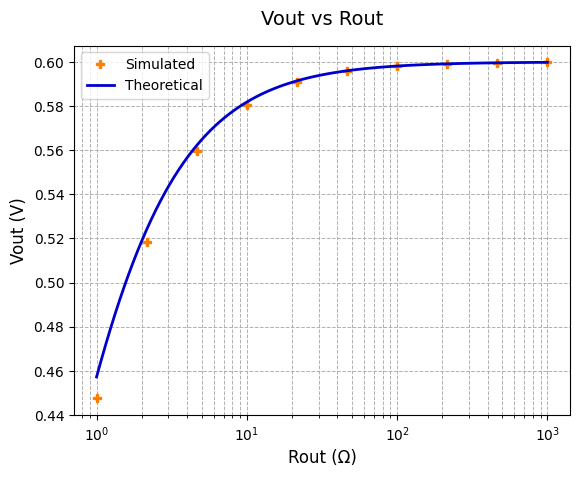

In [69]:
y_teo_table = []
x_teo = []
y_teo = []
y_sim = []
x_sim = []

file_path = 'data.csv'
df = pd.read_csv(file_path)

y_sim = df['Vout_avg']
x_sim = df['rout ']

# calculate the theoretical output voltage for the simulated Rout values
for x in x_sim:
    y_teo_table.append(calc_Vout(Vin_1_val, Vin_2_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, x, T_clk_val))

# calculate the theoretical output voltage for a range of Rout values
x_teo = np.logspace(np.log10(x_sim.min()), np.log10(x_sim.max()), num=100)
for x in x_teo:
    y_teo.append(calc_Vout(Vin_1_val, Vin_2_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, x, T_clk_val))

# plot the theoretical and simulated efficiency vs Rout    
plt.plot(x_sim, y_sim, marker='P', linestyle='', markersize=6, color=color_sim, label='Simulated')
plt.plot(x_teo, y_teo, linestyle='-', linewidth=2, color=color_teo, label='Theoretical')
plt.xscale('log')
plt.xlabel('Rout (Ω)', fontsize=12)
plt.ylabel('Vout (V)', fontsize=12)
plt.title('Vout vs Rout', fontsize=14, pad=15)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10)



### Efficiency vs Rout

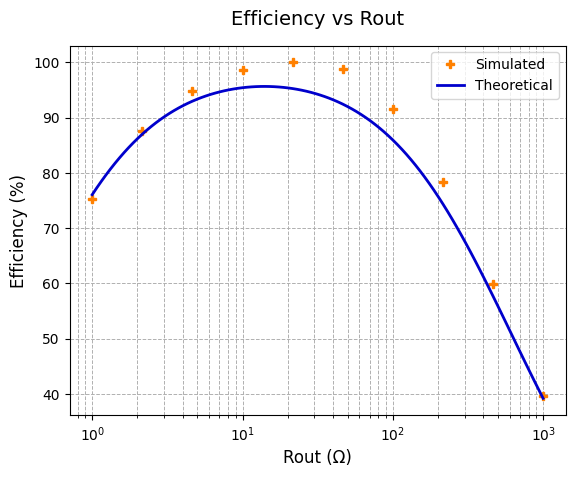

In [70]:
y_teo_table = []
x_teo = []
y_teo = []
y_sim = []
x_sim = []

file_path = 'data.csv'
df = pd.read_csv(file_path)

x_sim = df['rout ']
y_sim = df['Efficiency']

# calculate the theoretical efficiency for the simulated Rout values
for x in x_sim:
    y_teo_table.append(calc_Efficiency(Vin_1_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, x, T_clk_val)*100)

# calculate the theoretical efficiency for a range of Rout values
x_teo = np.logspace(np.log10(x_sim.min()), np.log10(x_sim.max()), num=100)
for x in x_teo:
    y_teo.append(calc_Efficiency(Vin_1_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, x, T_clk_val)*100)

# plot the theoretical and simulated efficiency vs Rout    
plt.plot(x_sim, y_sim, marker='P', linestyle='', markersize=6, color=color_sim, label='Simulated')
plt.plot(x_teo, y_teo, linestyle='-', linewidth=2, color=color_teo, label='Theoretical')
plt.xscale('log')
plt.xlabel('Rout (Ω)', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.title('Efficiency vs Rout', fontsize=14, pad=15)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10)

### Vout vs Fclk

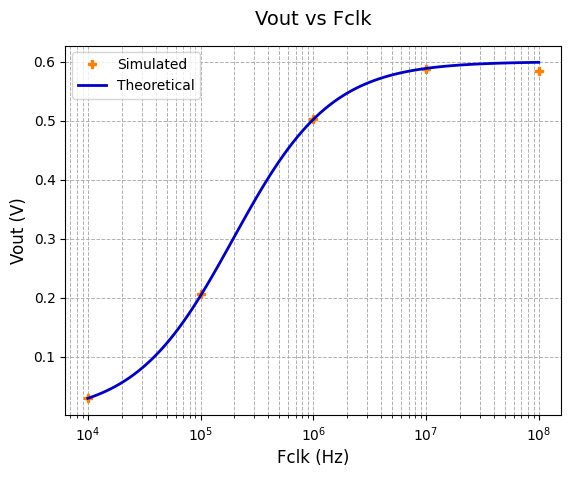

In [71]:
y_teo_table = []
x_teo = []
y_teo = []
y_sim = []
x_sim = []

file_path = 'data.csv'
df = pd.read_csv(file_path)

y_sim = df['Vout_avg']
x_sim = df['Fclk ']

# calculate the theoretical output voltage for the simulated Fclk values
for x in x_sim:
    y_teo_table.append(calc_Vout(Vin_1_val, Vin_2_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, Rout_val, 1/x))

# calculate the theoretical output voltage for a range of Fclk values
x_teo = np.logspace(np.log10(x_sim.min()), np.log10(x_sim.max()), num=100)
for x in x_teo:
    y_teo.append(calc_Vout(Vin_1_val, Vin_2_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, Rout_val, 1/x))

# plot the theoretical and simulated efficiency vs Fclk
plt.plot(x_sim, y_sim, marker='P', linestyle='', markersize=6, color=color_sim, label='Simulated')
plt.plot(x_teo, y_teo, linestyle='-', linewidth=2, color=color_teo, label='Theoretical')
plt.xscale('log')
plt.xlabel('Fclk (Hz)', fontsize=12)
plt.ylabel('Vout (V)', fontsize=12)
plt.title('Vout vs Fclk', fontsize=14, pad=15)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10)

### Efficiency vs Fclk

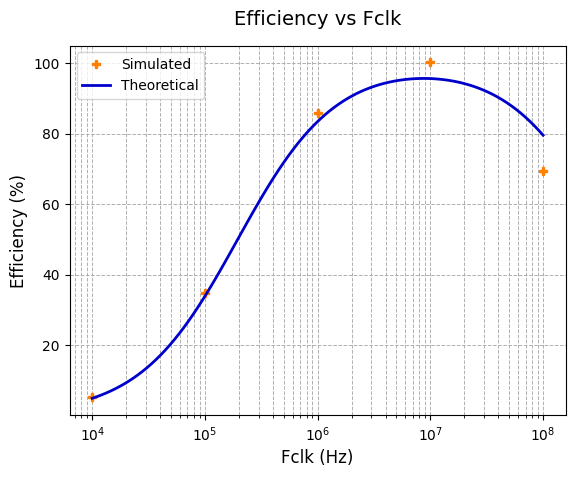

In [72]:
y_teo_table = []
x_teo = []
y_teo = []
y_sim = []
x_sim = []

file_path = 'data.csv'
df = pd.read_csv(file_path)

x_sim = df['Fclk ']
y_sim = df['Efficiency']

# calculate the theoretical efficiency for the simulated Fclk values
for x in x_sim:
    y_teo_table.append(calc_Efficiency(Vin_1_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, Rout_val, 1/x)*100)

# calculate the theoretical efficiency for a range of Fclk values
x_teo = np.logspace(np.log10(x_sim.min()), np.log10(x_sim.max()), num=100)
for x in x_teo:
    y_teo.append(calc_Efficiency(Vin_1_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, Rout_val, 1/x)*100)

# plot the theoretical and simulated efficiency vs Fclk
plt.plot(x_sim, y_sim, marker='P', linestyle='', markersize=6, color=color_sim, label='Simulated')
plt.plot(x_teo, y_teo, linestyle='-', linewidth=2, color=color_teo, label='Theoretical')
plt.xscale('log')
plt.xlabel('Fclk (Hz)', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.title('Efficiency vs Fclk', fontsize=14, pad=15)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10)

### Vout vs Cfly

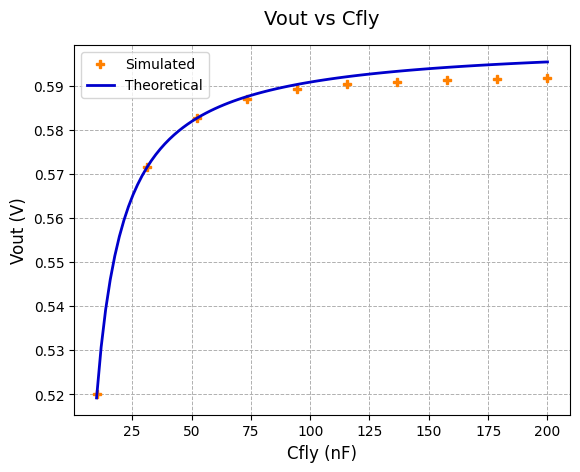

In [73]:
y_teo_table = []
x_teo = []
y_teo = []
y_sim = []
x_sim = []

file_path = 'data.csv'
df = pd.read_csv(file_path)

y_sim = df['Vout_avg']
x_sim = df['Cf ']

# calculate the theoretical output voltage for the simulated Cfly values
for x in x_sim:
    y_teo_table.append(calc_Vout(Vin_1_val, Vin_2_val, x, Cout_val, Cp_1_val, Cp_2_val, Rout_val, T_clk_val))

# calculate the theoretical output voltage for a range of Cfly values (in linear scale)
x_teo = np.linspace(x_sim.min(), x_sim.max(), num=100)
for x in x_teo:
    y_teo.append(calc_Vout(Vin_1_val, Vin_2_val, x, Cout_val, Cp_1_val, Cp_2_val, Rout_val, T_clk_val))

# plot the theoretical and simulated efficiency vs Cfly
plt.plot(np.multiply(x_sim,10**9), y_sim, marker='P', linestyle='', markersize=6, color=color_sim, label='Simulated')
plt.plot(np.multiply(x_teo,10**9), y_teo, linestyle='-', linewidth=2, color=color_teo, label='Theoretical')
plt.xlabel('Cfly (nF)', fontsize=12)
plt.ylabel('Vout (V)', fontsize=12)
plt.title('Vout vs Cfly', fontsize=14, pad=15)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10)

### Efficiency vs Cfly

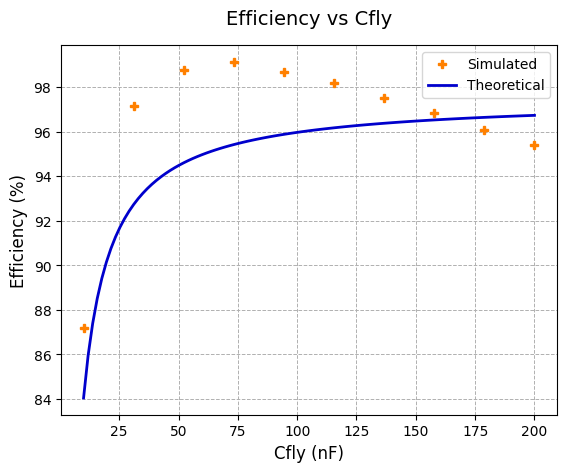

In [74]:
y_teo_table = []
x_teo = []
y_teo = []
y_sim = []
x_sim = []

file_path = 'data.csv'
df = pd.read_csv(file_path)

x_sim = df['Cf ']
y_sim = df['Efficiency']

# calculate the theoretical efficiency for the simulated Cfly values
for x in x_sim:
    y_teo_table.append(calc_Efficiency(Vin_1_val, x, Cout_val, Cp_1_val, Cp_2_val, Rout_val, T_clk_val)*100)

# calculate the theoretical efficiency for a range of Cfly values (in linear scale)
x_teo = np.linspace(x_sim.min(), x_sim.max(), num=100)
for x in x_teo:
    y_teo.append(calc_Efficiency(Vin_1_val, x, Cout_val, Cp_1_val, Cp_2_val, Rout_val, T_clk_val)*100)

# plot the theoretical and simulated efficiency vs Cfly
plt.plot(np.multiply(x_sim,10**9), y_sim, marker='P', linestyle='', markersize=6, color=color_sim, label='Simulated')
plt.plot(np.multiply(x_teo,10**9), y_teo, linestyle='-', linewidth=2, color=color_teo, label='Theoretical')
plt.xlabel('Cfly (nF)', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.title('Efficiency vs Cfly', fontsize=14, pad=15)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10)

### Vout vs Cout

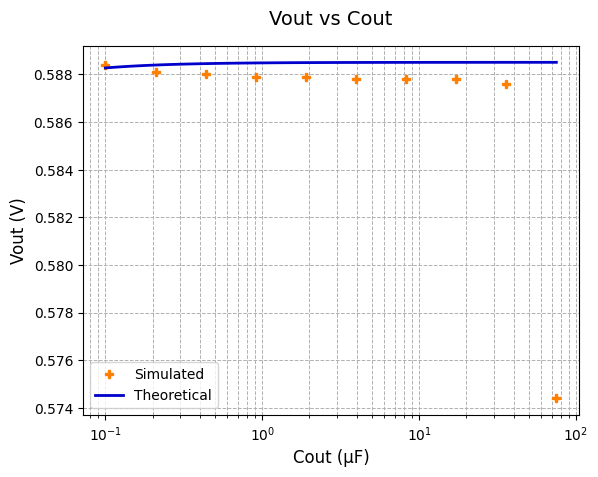

In [75]:
y_teo_table = []
x_teo = []
y_teo = []
y_sim = []
x_sim = []

file_path = 'data.csv'
df = pd.read_csv(file_path)

y_sim = df['Vout_avg']
x_sim = df['Cout ']

# calculate the theoretical output voltage for the simulated Cout values
for x in x_sim:
    y_teo_table.append(calc_Vout(Vin_1_val, Vin_2_val, Cfly_val, x, Cp_1_val, Cp_2_val, Rout_val, T_clk_val))

# calculate the theoretical output voltage for a range of Cout values (in log scale)
x_teo = np.logspace(np.log10(x_sim.min()), np.log10(x_sim.max()), num=100)
for x in x_teo:
    y_teo.append(calc_Vout(Vin_1_val, Vin_2_val, Cfly_val, x, Cp_1_val, Cp_2_val, Rout_val, T_clk_val))
    
# plot the theoretical and simulated efficiency vs Cout
plt.plot(np.multiply(x_sim,10**6), y_sim, marker='P', linestyle='', markersize=6, color=color_sim, label='Simulated')
plt.plot(np.multiply(x_teo,10**6), y_teo, linestyle='-', linewidth=2, color=color_teo, label='Theoretical')
plt.xscale('log')
plt.xlabel('Cout (µF)', fontsize=12)
plt.ylabel('Vout (V)', fontsize=12)
plt.title('Vout vs Cout', fontsize=14, pad=15)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10)

### Efficiency vs Cout

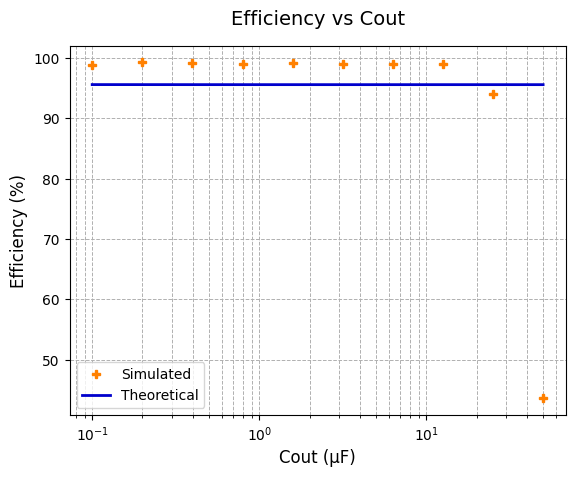

In [76]:
y_teo_table = []
x_teo = []
y_teo = []
y_sim = []
x_sim = []

file_path = 'data.csv'
df = pd.read_csv(file_path)

x_sim = df['Cout ']
y_sim = df['Efficiency']

# calculate the theoretical efficiency for the simulated Cout values
for x in x_sim:
    y_teo_table.append(calc_Efficiency(Vin_1_val, Cfly_val, x, Cp_1_val, Cp_2_val, Rout_val, T_clk_val)*100)

# calculate the theoretical efficiency for a range of Cout values (in log scale)
x_teo = np.logspace(np.log10(x_sim.min()), np.log10(x_sim.max()), num=100)
for x in x_teo:
    y_teo.append(calc_Efficiency(Vin_1_val, Cfly_val, x, Cp_1_val, Cp_2_val, Rout_val, T_clk_val)*100)

# plot the theoretical and simulated efficiency vs Cout
plt.plot(np.multiply(x_sim,10**6), y_sim, marker='P', linestyle='', markersize=6, color=color_sim, label='Simulated')
plt.plot(np.multiply(x_teo,10**6), y_teo, linestyle='-', linewidth=2, color=color_teo, label='Theoretical')
plt.xscale('log')
plt.xlabel('Cout (µF)', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.title('Efficiency vs Cout', fontsize=14, pad=15)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10)

### Vout vs Cp

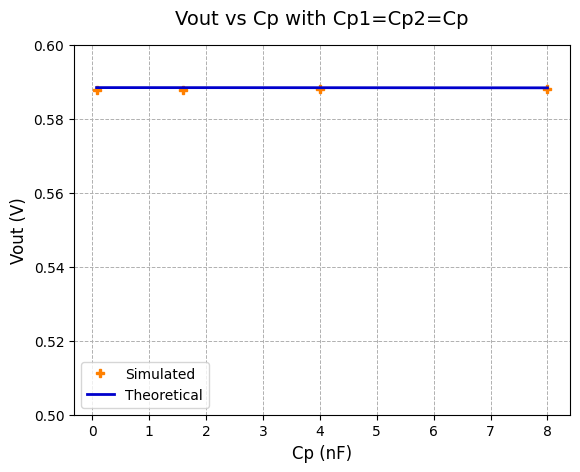

In [77]:
y_teo_table = []
x_teo = []
y_teo = []
y_sim = []
x_sim = []

file_path = 'data.csv'
df = pd.read_csv(file_path)

y_sim = df['Vout_avg']
x_sim = df['Cp ']

# calculate the theoretical output voltage for the simulated Cp values
for x in x_sim:
    y_teo_table.append(calc_Vout(Vin_1_val, Vin_2_val, Cfly_val, Cout_val, x, x, Rout_val, T_clk_val))

# calculate the theoretical output voltage for a range of Cp values (in linear scale)
x_teo = np.linspace(x_sim.min(), x_sim.max(), num=100)
for x in x_teo:
    y_teo.append(calc_Vout(Vin_1_val, Vin_2_val, Cfly_val, Cout_val, x, x, Rout_val, T_clk_val))

# plot the theoretical and simulated efficiency vs Cp
plt.plot(np.multiply(x_sim,10**9), y_sim, marker='P', linestyle='', markersize=6, color=color_sim, label='Simulated')
plt.plot(np.multiply(x_teo,10**9), y_teo, linestyle='-', linewidth=2, color=color_teo, label='Theoretical')
plt.ylim([0.5,0.6])
plt.xlabel('Cp (nF)', fontsize=12)
plt.ylabel('Vout (V)', fontsize=12)
plt.title('Vout vs Cp with Cp1=Cp2=Cp', fontsize=14, pad=15)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10)

### Efficiency vs Cp

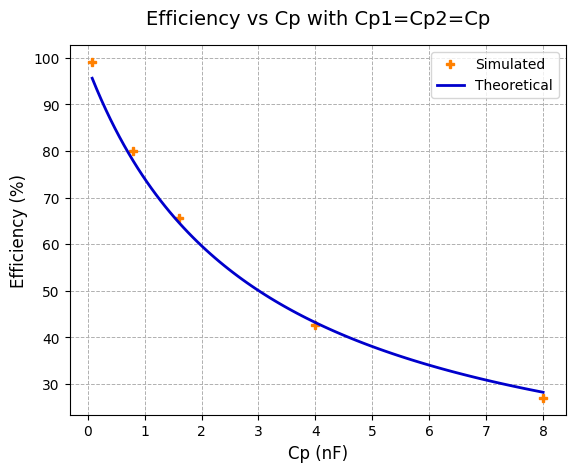

In [78]:
y_teo_table = []
x_teo = []
y_teo = []
y_sim = []
x_sim = []

file_path = 'data.csv'
df = pd.read_csv(file_path)

x_sim = df['Cp ']
y_sim = df['Efficiency']

# calculate the theoretical efficiency for the simulated Cp values
for x in x_sim:
    y_teo_table.append(calc_Efficiency(Vin_1_val, Cfly_val, Cout_val, x, x, Rout_val, T_clk_val)*100)

# calculate the theoretical efficiency for a range of Cp values (in linear scale)
x_teo = np.linspace(x_sim.min(), x_sim.max(), num=100)
for x in x_teo:
    y_teo.append(calc_Efficiency(Vin_1_val, Cfly_val, Cout_val, x, x, Rout_val, T_clk_val)*100)

# plot the theoretical and simulated efficiency vs Cp
plt.plot(np.multiply(x_sim,10**9), y_sim, marker='P', linestyle='', markersize=6, color=color_sim, label='Simulated')
plt.plot(np.multiply(x_teo,10**9), y_teo, linestyle='-', linewidth=2, color=color_teo, label='Theoretical')
plt.xlabel('Cp (nF)', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.title('Efficiency vs Cp with Cp1=Cp2=Cp', fontsize=14, pad=15)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10)

# Parametric Analysis for Design

### Fixed values

In [79]:
Vin_1_val = 1.2
Vin_2_val = 0
Cfly_val = 50 * 10**-9
Cout_val = 50 * Cfly_val
Cp_1_val = 0.001 * Cfly_val
Cp_2_val = 0.001 * Cfly_val
Rout_val = 16
F_clk_val = 10 * 10**6 # 10 MHz
T_clk_val = 1/F_clk_val

### Parametrics

In [80]:
Cfly_vals = np.multiply([10, 20, 30, 40, 50, 60, 70, 80, 90, 100],10**-9)
Rout_vals = [10, 12, 14, 16, 18, 20]
Cp_1_vals = np.multiply([0.001, 0.01, 0.02, 0.05], Cfly_val)
Cp_2_vals = np.multiply([0.001, 0.01, 0.02, 0.05], Cfly_val)

V_CR_vals = np.linspace(0, 0.5, 100)
F_clk_vals = np.logspace(3, 8, 100)  # Clock frequency from 10^4 to 10^9 Hz
T_clk_vals = 1/F_clk_vals


### Test Values

In [81]:
V_CR_test_vals = [0.1, 0.2, 0.3, 0.4, 0.5]
F_clk_test_vals = [10**4, 10**5, 10**6, 10**7, 10**8]
T_clk_test_vals = 1/np.array(F_clk_test_vals)

V_CR_vals = np.sort(np.unique(np.concatenate((V_CR_vals, V_CR_test_vals))))
F_clk_vals = np.sort(np.unique(np.concatenate((F_clk_vals, F_clk_test_vals))))
T_clk_vals = 1/F_clk_vals

### Ideal

#### Voutp vs F_clk

In [82]:
def Voutp_value(Vin_1_val, Vin_2_val, Cfly_val, Rout_val, T_clk_val):
    res = Voutp_expr.subs({
        Vin_1: Vin_1_val,
        Vin_2: Vin_2_val,
        Cfly: Cfly_val,
        Rout: Rout_val,
        T_clk: T_clk_val
    })
    return res.evalf()

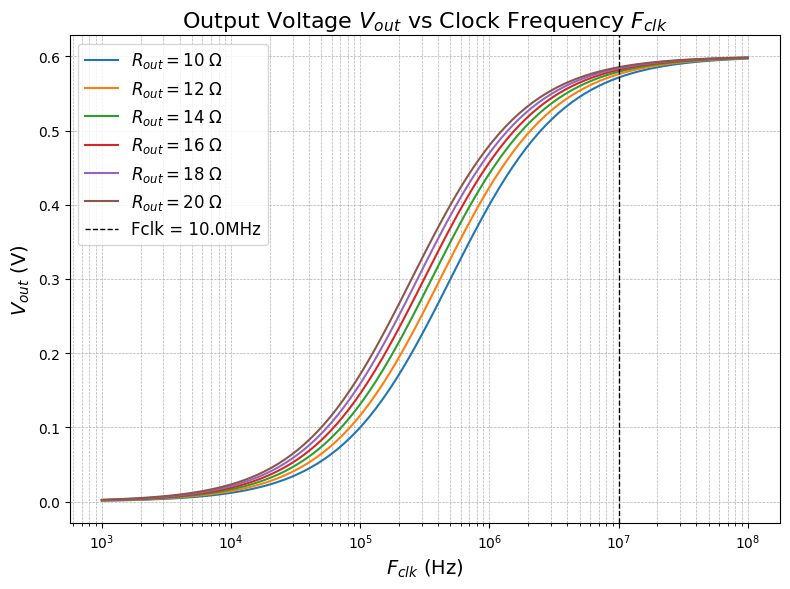

In [83]:
Voutp_test_vals = {}

plt.figure(figsize=(8, 6))

for rout in Rout_vals:
    Voutp_vals = []
    Voutp_test_vals[rout] = {}

    for t_clk in T_clk_vals:
        Voutp_vals.append(Voutp_value(Vin_1_val, Vin_2_val, Cfly_val, rout, t_clk))
        if t_clk in T_clk_test_vals:
            Voutp_test_vals[rout][t_clk] = Voutp_vals[-1]

    plt.plot(F_clk_vals, Voutp_vals, label=f'$R_{{out}} = {rout:.0f}$ Ω')

plt.axvline(x=F_clk_val, color='black', linestyle='--', linewidth=1, label=f'Fclk = {F_clk_val * 10**-6}MHz')
plt.xscale('log')
plt.xlabel('$F_{clk}$ (Hz)', fontsize=14)
plt.ylabel('$V_{out}$ (V)', fontsize=14)
plt.title('Output Voltage $V_{out}$ vs Clock Frequency $F_{clk}$', fontsize=16)
plt.grid(which="both", linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

In [84]:
print('Voutp test values:')
for rout, values in Voutp_test_vals.items():
    print(f'Rout = {rout} Ω:')
    for t_clk, value in values.items():
        print(f'\tF_clk = {1/t_clk * 10**-6:.2e} MHz: {value:.4f} V')

Voutp test values:
Rout = 10 Ω:
	F_clk = 1.00e-02 MHz: 0.0118 V
	F_clk = 1.00e-01 MHz: 0.1000 V
	F_clk = 1.00e+00 MHz: 0.4000 V
	F_clk = 1.00e+01 MHz: 0.5714 V
	F_clk = 1.00e+02 MHz: 0.5970 V
Rout = 12 Ω:
	F_clk = 1.00e-02 MHz: 0.0141 V
	F_clk = 1.00e-01 MHz: 0.1161 V
	F_clk = 1.00e+00 MHz: 0.4235 V
	F_clk = 1.00e+01 MHz: 0.5760 V
	F_clk = 1.00e+02 MHz: 0.5975 V
Rout = 14 Ω:
	F_clk = 1.00e-02 MHz: 0.0163 V
	F_clk = 1.00e-01 MHz: 0.1312 V
	F_clk = 1.00e+00 MHz: 0.4421 V
	F_clk = 1.00e+01 MHz: 0.5793 V
	F_clk = 1.00e+02 MHz: 0.5979 V
Rout = 16 Ω:
	F_clk = 1.00e-02 MHz: 0.0186 V
	F_clk = 1.00e-01 MHz: 0.1455 V
	F_clk = 1.00e+00 MHz: 0.4571 V
	F_clk = 1.00e+01 MHz: 0.5818 V
	F_clk = 1.00e+02 MHz: 0.5981 V
Rout = 18 Ω:
	F_clk = 1.00e-02 MHz: 0.0208 V
	F_clk = 1.00e-01 MHz: 0.1588 V
	F_clk = 1.00e+00 MHz: 0.4696 V
	F_clk = 1.00e+01 MHz: 0.5838 V
	F_clk = 1.00e+02 MHz: 0.5983 V
Rout = 20 Ω:
	F_clk = 1.00e-02 MHz: 0.0231 V
	F_clk = 1.00e-01 MHz: 0.1714 V
	F_clk = 1.00e+00 MHz: 0.4800 V
	F_clk 

#### Efficiency vs F_clk

In [85]:
def Eff_i_value(Cfly_val, Rout_val, T_clk_val):
    res = eff_params.subs({
        Cfly: Cfly_val,
        Rout: Rout_val,
        T_clk: T_clk_val
    })
    return res.evalf()

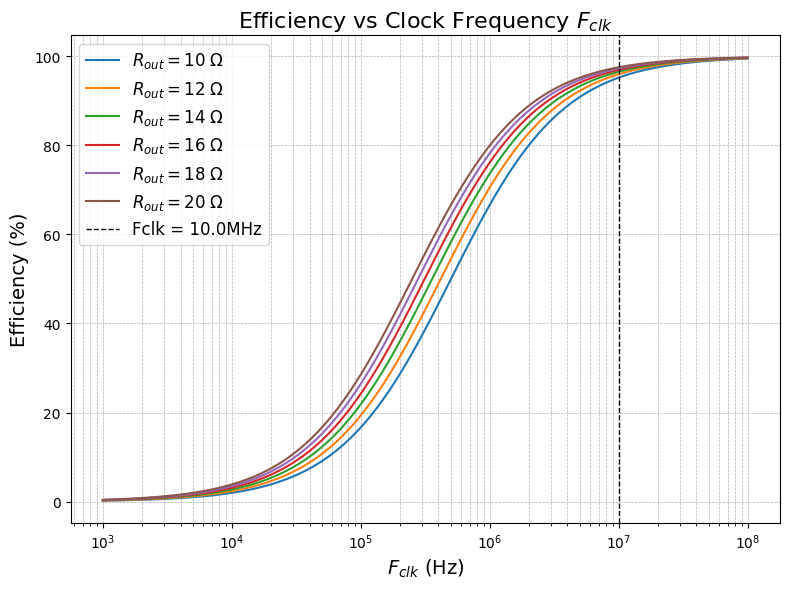

In [86]:
Eff_i_test_vals = {}

plt.figure(figsize=(8, 6))
for rout in Rout_vals:
    Eff_i_vals = []
    Eff_i_test_vals[rout] = {}

    for t_clk in T_clk_vals:
        Eff_i_vals.append(Eff_i_value(Cfly_val, rout, t_clk))
        if t_clk in T_clk_test_vals:
            Eff_i_test_vals[rout][t_clk] = Eff_i_vals[-1]
    
    plt.plot(F_clk_vals, np.multiply(Eff_i_vals,100), label=f'$R_{{out}} = {rout:.0f}$ Ω')

plt.axvline(x=F_clk_val, color='black', linestyle='--', linewidth=1, label=f'Fclk = {F_clk_val * 10**-6}MHz')
plt.xscale('log')
plt.xlabel('$F_{clk}$ (Hz)', fontsize=14)
plt.ylabel('Efficiency (%)', fontsize=14)
plt.title('Efficiency vs Clock Frequency $F_{clk}$', fontsize=16)
plt.grid(which="both", linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

In [87]:
print('Efficiency test values:')
for rout, values in Eff_i_test_vals.items():
    print(f'Rout = {rout} Ω:')
    for t_clk, value in values.items():
        print(f'\tF_clk = {1/t_clk * 10**-6:.2e} MHz: {value*100:.4f} %')

Efficiency test values:
Rout = 10 Ω:
	F_clk = 1.00e-02 MHz: 1.9608 %
	F_clk = 1.00e-01 MHz: 16.6667 %
	F_clk = 1.00e+00 MHz: 66.6667 %
	F_clk = 1.00e+01 MHz: 95.2381 %
	F_clk = 1.00e+02 MHz: 99.5025 %
Rout = 12 Ω:
	F_clk = 1.00e-02 MHz: 2.3438 %
	F_clk = 1.00e-01 MHz: 19.3548 %
	F_clk = 1.00e+00 MHz: 70.5882 %
	F_clk = 1.00e+01 MHz: 96.0000 %
	F_clk = 1.00e+02 MHz: 99.5851 %
Rout = 14 Ω:
	F_clk = 1.00e-02 MHz: 2.7237 %
	F_clk = 1.00e-01 MHz: 21.8750 %
	F_clk = 1.00e+00 MHz: 73.6842 %
	F_clk = 1.00e+01 MHz: 96.5517 %
	F_clk = 1.00e+02 MHz: 99.6441 %
Rout = 16 Ω:
	F_clk = 1.00e-02 MHz: 3.1008 %
	F_clk = 1.00e-01 MHz: 24.2424 %
	F_clk = 1.00e+00 MHz: 76.1905 %
	F_clk = 1.00e+01 MHz: 96.9697 %
	F_clk = 1.00e+02 MHz: 99.6885 %
Rout = 18 Ω:
	F_clk = 1.00e-02 MHz: 3.4749 %
	F_clk = 1.00e-01 MHz: 26.4706 %
	F_clk = 1.00e+00 MHz: 78.2609 %
	F_clk = 1.00e+01 MHz: 97.2973 %
	F_clk = 1.00e+02 MHz: 99.7230 %
Rout = 20 Ω:
	F_clk = 1.00e-02 MHz: 3.8462 %
	F_clk = 1.00e-01 MHz: 28.5714 %
	F_clk = 1.00

### Real

#### Voutp vs F_clk

In [88]:
def Voutp_p_value(Vin_1_val, Vin_2_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, Rout_val, T_clk_val):
    res = Voutp_p_expr.subs({
        Vin_1: Vin_1_val,
        Vin_2: Vin_2_val,
        Cfly: Cfly_val,
        Cout: Cout_val,
        Cp_1: Cp_1_val,
        Cp_2: Cp_2_val,
        Rout: Rout_val,
        T_clk: T_clk_val
    })
    return res.evalf()

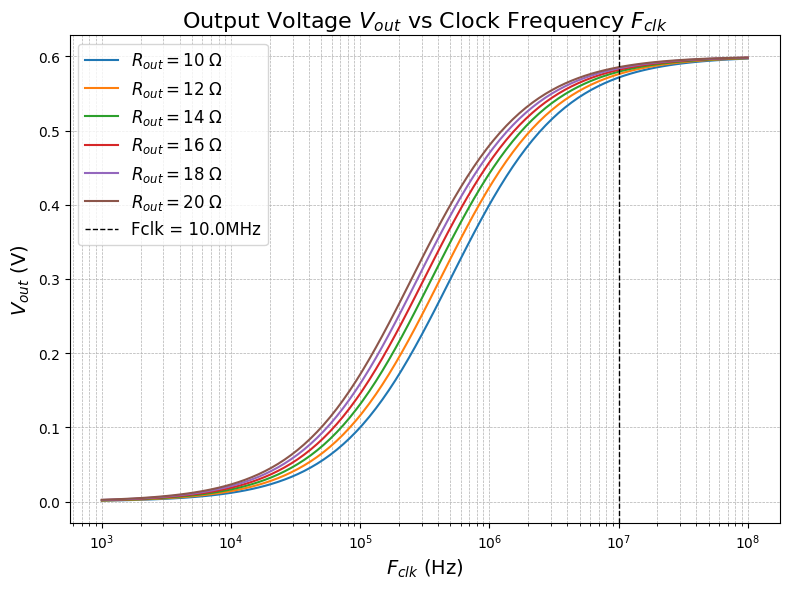

In [89]:
Voutp_p_test_vals = {}

plt.figure(figsize=(8, 6))
for rout in Rout_vals:
    Voutp_p_vals = []
    Voutp_p_test_vals[rout] = {}

    for t_clk in T_clk_vals:
        Voutp_p_vals.append(Voutp_p_value(Vin_1_val, Vin_2_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, rout, t_clk))
        if t_clk in T_clk_test_vals:
            Voutp_p_test_vals[rout][t_clk] = Voutp_p_vals[-1]
            
    plt.plot(F_clk_vals, Voutp_p_vals, label=f'$R_{{out}} = {rout:.0f}$ Ω')

plt.axvline(x=F_clk_val, color='black', linestyle='--', linewidth=1, label=f'Fclk = {F_clk_val * 10**-6}MHz')
plt.xscale('log')
plt.xlabel('$F_{clk}$ (Hz)', fontsize=14)
plt.ylabel('$V_{out}$ (V)', fontsize=14)
plt.title('Output Voltage $V_{out}$ vs Clock Frequency $F_{clk}$', fontsize=16)
plt.grid(which="both", linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

In [90]:
print('Real Voutp test values:')
for rout, values in Voutp_p_test_vals.items():
    print(f'Rout = {rout} Ω:')
    for t_clk, value in values.items():
        print(f'\tF_clk = {1/t_clk * 10**-6:.2e} MHz: {value:.4f} V')

Real Voutp test values:
Rout = 10 Ω:
	F_clk = 1.00e-02 MHz: 0.0118 V
	F_clk = 1.00e-01 MHz: 0.1000 V
	F_clk = 1.00e+00 MHz: 0.4001 V
	F_clk = 1.00e+01 MHz: 0.5714 V
	F_clk = 1.00e+02 MHz: 0.5970 V
Rout = 12 Ω:
	F_clk = 1.00e-02 MHz: 0.0141 V
	F_clk = 1.00e-01 MHz: 0.1162 V
	F_clk = 1.00e+00 MHz: 0.4236 V
	F_clk = 1.00e+01 MHz: 0.5760 V
	F_clk = 1.00e+02 MHz: 0.5975 V
Rout = 14 Ω:
	F_clk = 1.00e-02 MHz: 0.0163 V
	F_clk = 1.00e-01 MHz: 0.1313 V
	F_clk = 1.00e+00 MHz: 0.4422 V
	F_clk = 1.00e+01 MHz: 0.5793 V
	F_clk = 1.00e+02 MHz: 0.5979 V
Rout = 16 Ω:
	F_clk = 1.00e-02 MHz: 0.0186 V
	F_clk = 1.00e-01 MHz: 0.1455 V
	F_clk = 1.00e+00 MHz: 0.4572 V
	F_clk = 1.00e+01 MHz: 0.5818 V
	F_clk = 1.00e+02 MHz: 0.5981 V
Rout = 18 Ω:
	F_clk = 1.00e-02 MHz: 0.0209 V
	F_clk = 1.00e-01 MHz: 0.1589 V
	F_clk = 1.00e+00 MHz: 0.4696 V
	F_clk = 1.00e+01 MHz: 0.5838 V
	F_clk = 1.00e+02 MHz: 0.5983 V
Rout = 20 Ω:
	F_clk = 1.00e-02 MHz: 0.0231 V
	F_clk = 1.00e-01 MHz: 0.1715 V
	F_clk = 1.00e+00 MHz: 0.4800 V
	F

#### Efficiency vs F_clk

In [91]:
def Eff_p_params_value(Vin_1_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, Rout_val, T_clk_val):
    res = eff_p_params.subs({
        Vin_1: Vin_1_val,
        Cfly: Cfly_val,
        Cout: Cout_val,
        Cp_1: Cp_1_val,
        Cp_2: Cp_2_val,
        Rout: Rout_val,
        T_clk: T_clk_val
    })
    return res.evalf()

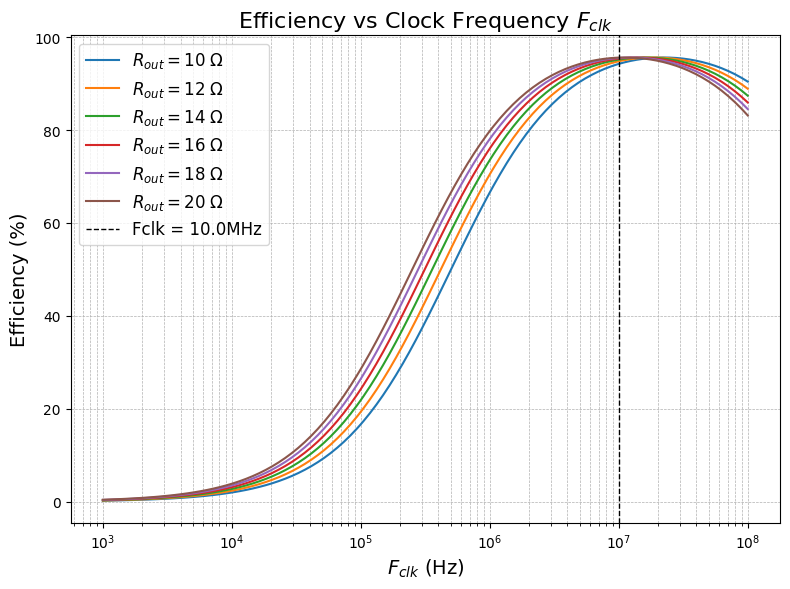

In [92]:
Eff_p_test_vals = {}

plt.figure(figsize=(8, 6))
for rout in Rout_vals:
    Eff_p_vals = []
    Eff_p_test_vals[rout] = {}

    for t_clk in T_clk_vals:
        Eff_p_vals.append(Eff_p_params_value(Vin_1_val, Cfly_val, Cout_val, Cp_1_val, Cp_2_val, rout, t_clk))
        if t_clk in T_clk_test_vals:
            Eff_p_test_vals[rout][t_clk] = Eff_p_vals[-1]
            
    plt.plot(F_clk_vals, np.multiply(Eff_p_vals,100), label=f'$R_{{out}} = {rout:.0f}$ Ω')

plt.axvline(x=F_clk_val, color='black', linestyle='--', linewidth=1, label=f'Fclk = {F_clk_val * 10**-6}MHz')
plt.xscale('log')
plt.xlabel('$F_{clk}$ (Hz)', fontsize=14)
plt.ylabel('Efficiency (%)', fontsize=14)
plt.title('Efficiency vs Clock Frequency $F_{clk}$', fontsize=16)
plt.grid(which="both", linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

In [93]:
print('Real Efficiency test values:')
for rout, values in Eff_p_test_vals.items():
    print(f'Rout = {rout} Ω:')
    for t_clk, value in values.items():
        print(f'\tF_clk = {1/t_clk * 10**-6:.2e} MHz: {value:.4f} %')

Real Efficiency test values:
Rout = 10 Ω:
	F_clk = 1.00e-02 MHz: 0.0196 %
	F_clk = 1.00e-01 MHz: 0.1666 %
	F_clk = 1.00e+00 MHz: 0.6658 %
	F_clk = 1.00e+01 MHz: 0.9425 %
	F_clk = 1.00e+02 MHz: 0.9043 %
Rout = 12 Ω:
	F_clk = 1.00e-02 MHz: 0.0234 %
	F_clk = 1.00e-01 MHz: 0.1935 %
	F_clk = 1.00e+00 MHz: 0.7048 %
	F_clk = 1.00e+01 MHz: 0.9482 %
	F_clk = 1.00e+02 MHz: 0.8890 %
Rout = 14 Ω:
	F_clk = 1.00e-02 MHz: 0.0272 %
	F_clk = 1.00e-01 MHz: 0.2187 %
	F_clk = 1.00e+00 MHz: 0.7355 %
	F_clk = 1.00e+01 MHz: 0.9517 %
	F_clk = 1.00e+02 MHz: 0.8740 %
Rout = 16 Ω:
	F_clk = 1.00e-02 MHz: 0.0310 %
	F_clk = 1.00e-01 MHz: 0.2423 %
	F_clk = 1.00e+00 MHz: 0.7604 %
	F_clk = 1.00e+01 MHz: 0.9540 %
	F_clk = 1.00e+02 MHz: 0.8594 %
Rout = 18 Ω:
	F_clk = 1.00e-02 MHz: 0.0347 %
	F_clk = 1.00e-01 MHz: 0.2646 %
	F_clk = 1.00e+00 MHz: 0.7809 %
	F_clk = 1.00e+01 MHz: 0.9553 %
	F_clk = 1.00e+02 MHz: 0.8452 %
Rout = 20 Ω:
	F_clk = 1.00e-02 MHz: 0.0385 %
	F_clk = 1.00e-01 MHz: 0.2856 %
	F_clk = 1.00e+00 MHz: 0.7981

#### Efficiency loss due to Cp

In [94]:
def Eff_p_vcr_value(V_CR_val, Cfly_val, Cp_1_val, Cp_2_val):
    res = eff_p_vcr.subs({
        V_CR: V_CR_val,
        Cfly: Cfly_val,
        Cp_1: Cp_1_val,
        Cp_2: Cp_2_val,
    })
    return res.evalf()

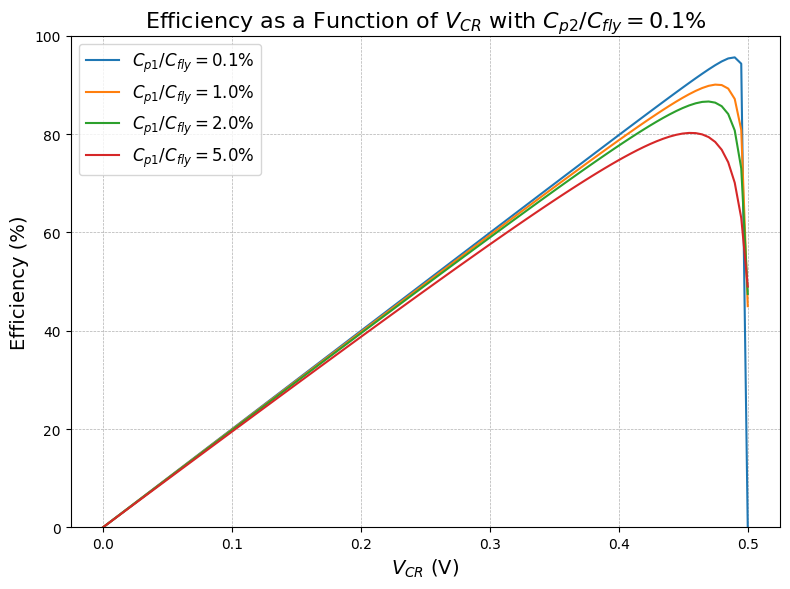

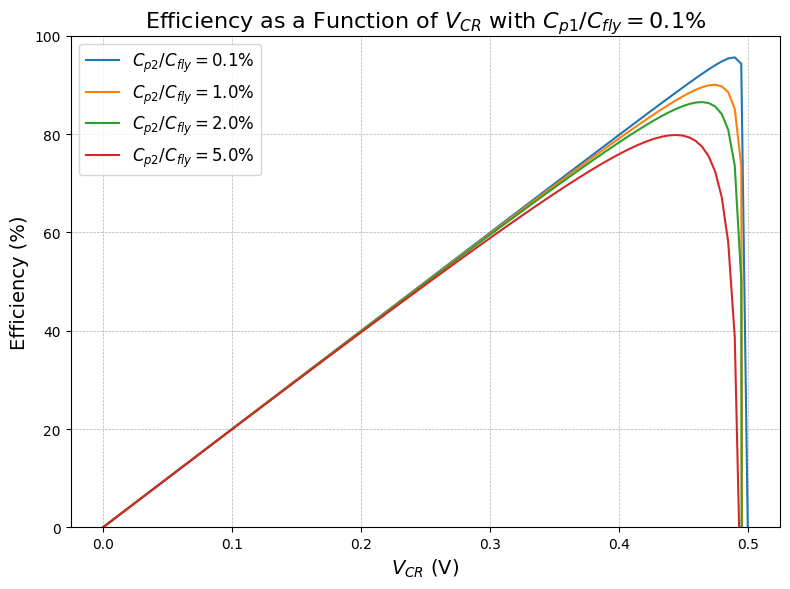

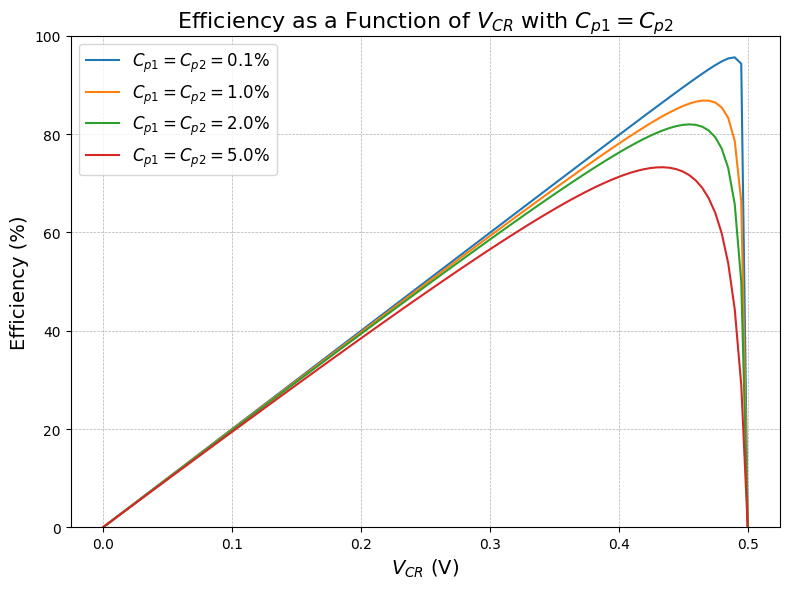

In [95]:
# fixed Cp2, varying Cp1
plt.figure(figsize=(8, 6))
for cp1 in Cp_1_vals:
    Eff_p_vcr_vals = []
    for vcr in V_CR_vals:
        Eff_p_vcr_vals.append(Eff_p_vcr_value(vcr, Cfly_val, cp1, Cp_2_val))
    plt.plot(V_CR_vals, np.multiply(Eff_p_vcr_vals,100), label=f'$C_{{p1}} / C_{{fly}} = {cp1/Cfly_val*100:.1f}\\%$')

plt.xlabel('$V_{CR}$ (V)', fontsize=14)
plt.ylabel('Efficiency (%)', fontsize=14)
plt.title('Efficiency as a Function of $V_{CR}$ with $C_{{p2}} / C_{{fly}} = 0.1\\%$', fontsize=16)
plt.ylim(0, 100)  # Efficiency limits
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# fixed Cp1, varying Cp2
plt.figure(figsize=(8, 6))
for cp2 in Cp_2_vals:
    Eff_p_vcr_vals = []
    for vcr in V_CR_vals:
        Eff_p_vcr_vals.append(Eff_p_vcr_value(vcr, Cfly_val, Cp_1_val, cp2))
    plt.plot(V_CR_vals, np.multiply(Eff_p_vcr_vals,100), label=f'$C_{{p2}} / C_{{fly}} = {cp2/Cfly_val*100:.1f}\\%$')

plt.xlabel('$V_{CR}$ (V)', fontsize=14)
plt.ylabel('Efficiency (%)', fontsize=14)
plt.title('Efficiency as a Function of $V_{CR}$ with $C_{{p1}} / C_{{fly}} = 0.1\\%$', fontsize=16)
plt.ylim(0, 100)  # Efficiency limits
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# varying Cp1 and Cp2 with Cp_vals = Cp_1_vals = Cp_2_vals
Cp_vals = Cp_1_vals
plt.figure(figsize=(8, 6))
for cp in Cp_vals:
    Eff_p_vcr_vals = []
    for vcr in V_CR_vals:
        Eff_p_vcr_vals.append(Eff_p_vcr_value(vcr, Cfly_val, cp, cp))
    plt.plot(V_CR_vals, np.multiply(Eff_p_vcr_vals,100), label=f'$C_{{p1}} = C_{{p2}} = {cp/Cfly_val*100:.1f}\\%$')

plt.xlabel('$V_{CR}$ (V)', fontsize=14)
plt.ylabel('Efficiency (%)', fontsize=14)
plt.title('Efficiency as a Function of $V_{CR}$ with $C_{{p1}} = C_{{p2}}$', fontsize=16)
plt.ylim(0, 100)  # Efficiency limits
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### Vout vs F_clk varying Cfly

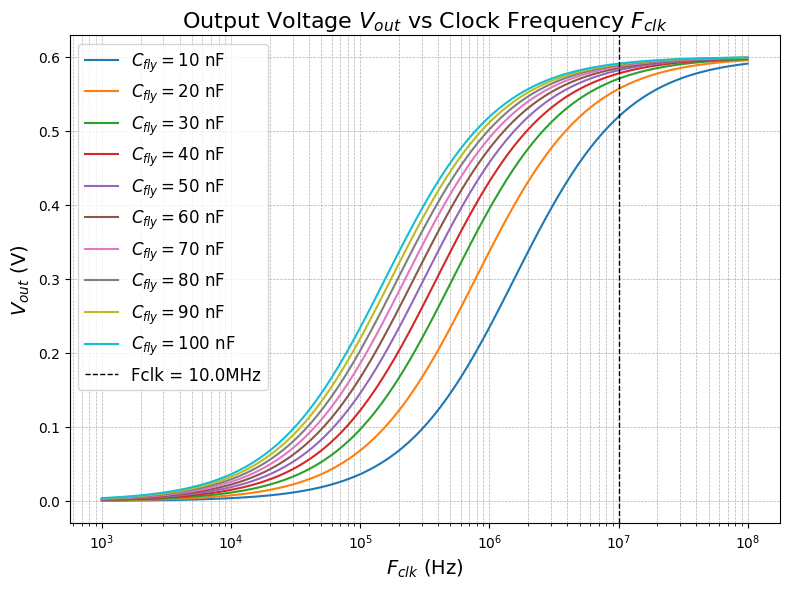

In [96]:
plt.figure(figsize=(8, 6))
for cfly in Cfly_vals:
    Voutp_p_vals = []
    for t_clk in T_clk_vals:
        Voutp_p_vals.append(Voutp_p_value(Vin_1_val, Vin_2_val, cfly, Cout_val, Cp_1_val, Cp_2_val, Rout_val, t_clk))
    plt.plot(F_clk_vals, Voutp_p_vals, label=f'$C_{{fly}} = {cfly*1e9:.0f}$ nF')
plt.axvline(x=F_clk_val, color='black', linestyle='--', linewidth=1, label=f'Fclk = {F_clk_val * 10**-6}MHz')
plt.xscale('log')
plt.xlabel('$F_{clk}$ (Hz)', fontsize=14)
plt.ylabel('$V_{out}$ (V)', fontsize=14)
plt.title('Output Voltage $V_{out}$ vs Clock Frequency $F_{clk}$', fontsize=16)
plt.grid(which="both", linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

#### Efficiency vs F_clk varying Cfly

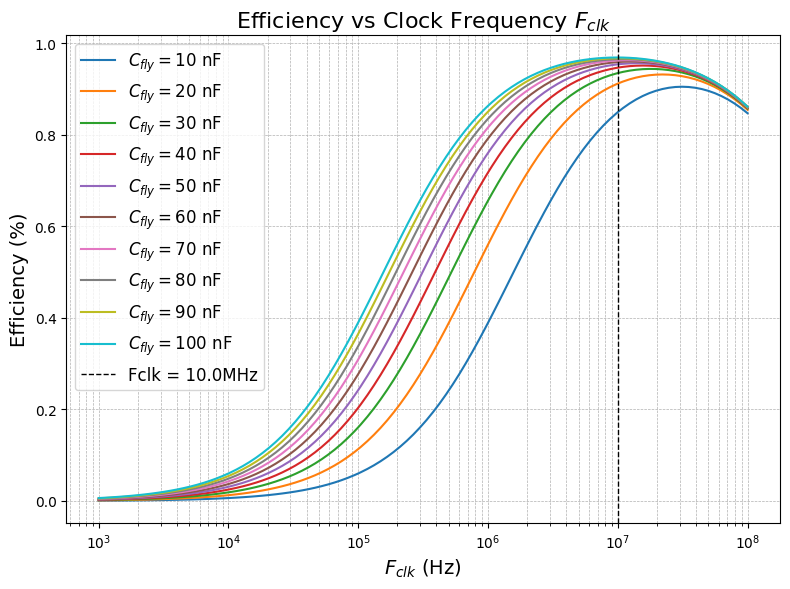

In [97]:
plt.figure(figsize=(8, 6))
for cfly in Cfly_vals:
    Eff_p_vals = []
    for t_clk in T_clk_vals:
        Eff_p_vals.append(Eff_p_params_value(Vin_1_val, cfly, Cout_val, Cp_1_val, Cp_2_val, Rout_val, t_clk))
    plt.plot(F_clk_vals, Eff_p_vals, label=f'$C_{{fly}} = {cfly*1e9:.0f}$ nF')
plt.axvline(x=F_clk_val, color='black', linestyle='--', linewidth=1, label=f'Fclk = {F_clk_val * 10**-6}MHz')
plt.xscale('log')
plt.xlabel('$F_{clk}$ (Hz)', fontsize=14)
plt.ylabel('Efficiency (%)', fontsize=14)
plt.title('Efficiency vs Clock Frequency $F_{clk}$', fontsize=16)
plt.grid(which="both", linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

#### Final Voutp values assuming ideal inputs for SC 2 and 3

In [98]:
VDD = 1.2
VCM = 0.6
VSS = 0

sc_1_Vin_1_val = VDD
sc_1_Vin_2_val = VSS

sc_2_Vin_1_val = VCM
sc_2_Vin_2_val = VSS

sc_3_Vin_1_val = VDD
sc_3_Vin_2_val = VCM

In [99]:
Vout_1 = Voutp_p_expr.subs({
    Vin_1: sc_1_Vin_1_val,
    Vin_2: sc_1_Vin_2_val,
    Cfly: Cfly_val,
    Cp_1: Cp_1_val,
    Cp_2: Cp_2_val,
    Rout: Rout_val,
    Cout: Cout_val,
    T_clk: T_clk_val
}).evalf()

Vout_2 = Voutp_p_expr.subs({
    Vin_1: sc_2_Vin_1_val,
    Vin_2: sc_2_Vin_2_val,
    Cfly: Cfly_val,
    Cp_1: Cp_1_val,
    Cp_2: Cp_2_val,
    Rout: Rout_val,
    Cout: Cout_val,
    T_clk: T_clk_val
}).evalf()

Vout_3 = Voutp_p_expr.subs({
    Vin_1: sc_3_Vin_1_val,
    Vin_2: sc_3_Vin_2_val,
    Cfly: Cfly_val,
    Cp_1: Cp_1_val,
    Cp_2: Cp_2_val,
    Rout: Rout_val,
    Cout: Cout_val,
    T_clk: T_clk_val
}).evalf()

display(Vout_1, Vout_2, Vout_3)

0.581820996780686

0.290910498390343

0.872737491363447

#### Final Voutp values

In [100]:
sc_1_Vin_1_val = VDD
sc_1_Vin_2_val = VSS

Vout_1 = Voutp_p_expr.subs({
    Vin_1: sc_1_Vin_1_val,
    Vin_2: sc_1_Vin_2_val,
    Cfly: Cfly_val,
    Cp_1: Cp_1_val,
    Cp_2: Cp_2_val,
    Rout: Rout_val,
    Cout: Cout_val,
    T_clk: T_clk_val
}).evalf()

sc_2_Vin_1_val = Vout_1
sc_2_Vin_2_val = VSS

sc_3_Vin_1_val = VDD
sc_3_Vin_2_val = Vout_1

Vout_2 = Voutp_p_expr.subs({
    Vin_1: sc_2_Vin_1_val,
    Vin_2: sc_2_Vin_2_val,
    Cfly: Cfly_val,
    Cp_1: Cp_1_val,
    Cp_2: Cp_2_val,
    Rout: Rout_val,
    Cout: Cout_val,
    T_clk: T_clk_val
}).evalf()

Vout_3 = Voutp_p_expr.subs({
    Vin_1: sc_3_Vin_1_val,
    Vin_2: sc_3_Vin_2_val,
    Cfly: Cfly_val,
    Cp_1: Cp_1_val,
    Cp_2: Cp_2_val,
    Rout: Rout_val,
    Cout: Cout_val,
    T_clk: T_clk_val
}).evalf()

display(Vout_1, Vout_2, Vout_3)

0.581820996780686

0.282096393579059

0.863923204877495